### Binary Classification problem 

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mlp

%matplotlib inline

### Reading data and creating dataframes 
Reading the given csv file 'CE802_P2_Data.csv'

In [111]:
mainDf = pd.read_csv("CE802_P2_Data.csv")
mainDf.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,16,6.03,-4.56,30.00,63.04,0.55,-0.78,0.96,-1.67,1,-339.75,0.84,9.90,-2.22,-9.53,False
1,6,1.41,-4.24,31.38,100.04,0.06,1.08,0.60,-3.67,1,-246.75,-0.62,12.32,-0.56,NaN,False
2,630,43.35,0.50,50.70,219.04,-3.46,10.08,5.65,-14.67,10,-129.75,-3.40,1.80,8.48,-10.29,False
3,30,2.79,-3.58,31.83,69.04,-0.40,-0.09,0.18,-1.67,1,-276.75,-0.32,13.32,1.36,-9.92,False
4,18,0.36,-6.62,32.97,75.04,2.43,0.24,0.48,-0.67,1,-294.75,3.14,10.80,-5.86,NaN,True


In [112]:
mainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   int64  
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   int64  
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     750 non-null    float64
 15  Class   1500 non-null   bool   
dtypes: bool(1), float64(13), int64(2)
memory usage: 177.4 KB


### Data Exploration:
As you can see we have total 1500 rows , with three data types float,int and boolean. 'F15' Column has 750 missing values denoted by NaN. So we need to carefully replace missing values.
- Treating missing values and identifying outliers in the data set

In [62]:
print("F1 -unique variables count --->",mainDf["F1"].unique().size)
print("F2 -unique variables count --->",mainDf["F2"].unique().size)
print("F3 -unique variables count --->",mainDf["F3"].unique().size)
print("F4 -unique variables count --->",mainDf["F4"].unique().size)
print("F5 -unique variables count --->",mainDf["F5"].unique().size)
print("F6 -unique variables count --->",mainDf["F6"].unique().size)
print("F7 -unique variables count --->",mainDf["F7"].unique().size)
print("F8 -unique variables count --->",mainDf["F8"].unique().size)
print("F9 -unique variables count --->",mainDf["F9"].unique().size)
print("F10 -unique variables count --->",mainDf["F10"].unique().size)
print("F11 -unique variables count --->",mainDf["F11"].unique().size)
print("F12 -unique variables count --->",mainDf["F12"].unique().size)
print("F13 -unique variables count --->",mainDf["F13"].unique().size)
print("F14 -unique variables count --->",mainDf["F14"].unique().size)
print("F15 -unique variables count --->",mainDf["F15"].unique().size)

F1 -unique variables count ---> 141
F2 -unique variables count ---> 400
F3 -unique variables count ---> 650
F4 -unique variables count ---> 214
F5 -unique variables count ---> 91
F6 -unique variables count ---> 656
F7 -unique variables count ---> 660
F8 -unique variables count ---> 216
F9 -unique variables count ---> 11
F10 -unique variables count ---> 4
F11 -unique variables count ---> 80
F12 -unique variables count ---> 432
F13 -unique variables count ---> 649
F14 -unique variables count ---> 646
F15 -unique variables count ---> 332


As you can see "F10" column has only 4 variables , which can be considered as a categorical values and also it means that column can be considered crucial to treat missing values in column "F15". 

<AxesSubplot:xlabel='F9', ylabel='F15'>

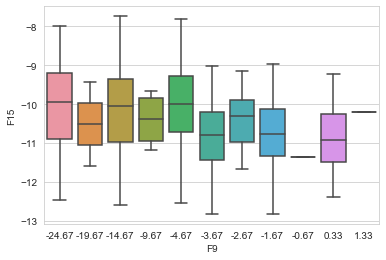

In [63]:
sns.set_style('whitegrid')
sns.boxplot(x='F9',y='F15',data=mainDf)

<AxesSubplot:xlabel='F15', ylabel='Count'>

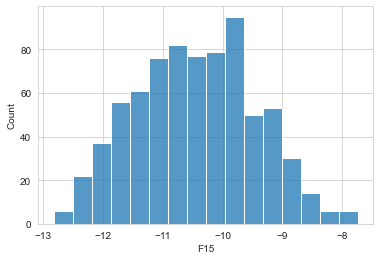

In [108]:
sns.histplot(mainDf['F15'])

<AxesSubplot:xlabel='F10', ylabel='F15'>

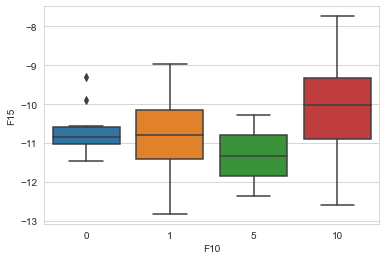

In [93]:
sns.boxplot(x='F10',y='F15',data=mainDf)

In [65]:
mainDf.corr()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
F1,1.000000,0.706639,0.690864,0.755121,0.540342,-0.675264,0.679250,0.733312,-0.600153,0.742369,-0.069969,-0.012291,-0.676389,0.682649,0.239084,-0.152249
F2,0.706639,1.000000,0.763419,0.837365,0.672167,-0.762769,0.755101,0.834246,-0.637508,0.888977,-0.194739,-0.276405,-0.753287,0.750944,0.297380,-0.191255
F3,0.690864,0.763419,1.000000,0.883349,0.614240,-0.809473,0.813816,0.863434,-0.614027,0.868528,-0.205886,-0.176375,-0.791322,0.804545,0.175460,-0.057144
F4,0.755121,0.837365,0.883349,1.000000,0.727545,-0.887500,0.884842,0.906307,-0.681754,0.956640,-0.224060,-0.182643,-0.873428,0.873595,0.195861,-0.080522
F5,0.540342,0.672167,0.614240,0.727545,1.000000,-0.619599,0.599455,0.721849,-0.599113,0.744822,-0.088436,-0.204661,-0.595590,0.611131,0.363370,-0.266599
F6,-0.675264,-0.762769,-0.809473,-0.887500,-0.619599,1.000000,-0.826213,-0.867305,0.637027,-0.877293,0.207080,0.181686,0.818105,-0.807678,-0.176167,0.058308
F7,0.679250,0.755101,0.813816,0.884842,0.599455,-0.826213,1.000000,0.861852,-0.630234,0.873724,-0.215099,-0.167082,-0.802995,0.804192,0.161148,-0.079108
F8,0.733312,0.834246,0.863434,0.906307,0.721849,-0.867305,0.861852,1.000000,-0.697186,0.954840,-0.203882,-0.201330,-0.854378,0.855536,0.234449,-0.135190
F9,-0.600153,-0.637508,-0.614027,-0.681754,-0.599113,0.637027,-0.630234,-0.697186,1.000000,-0.738079,-0.238974,0.336565,0.620092,-0.611943,-0.230740,0.144057
F10,0.742369,0.888977,0.868528,0.956640,0.744822,-0.877293,0.873724,0.954840,-0.738079,1.000000,-0.194345,-0.229981,-0.865109,0.863027,0.318372,-0.203649


<AxesSubplot:>

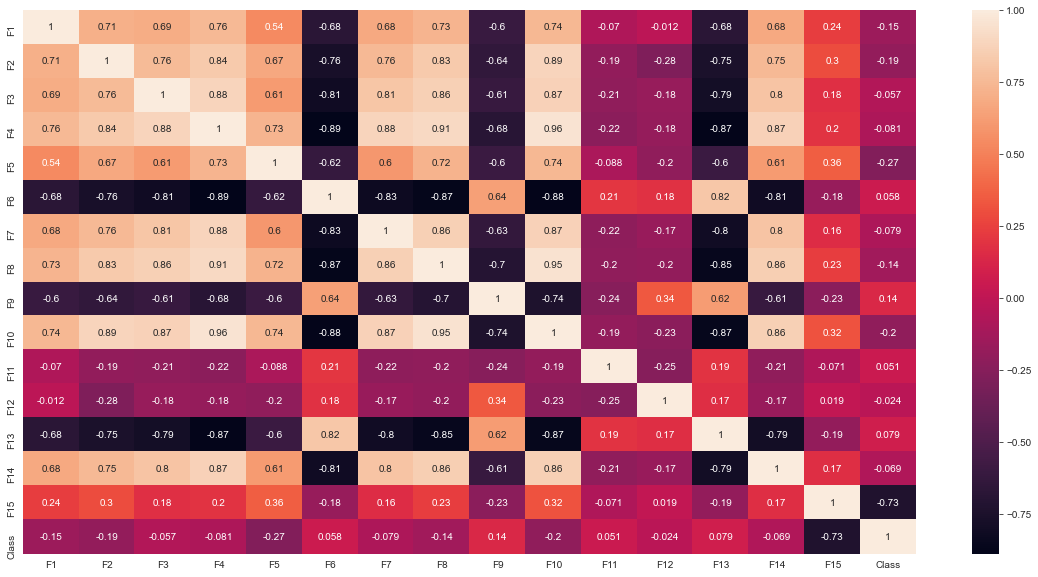

In [110]:
mlp.figure(figsize=(20,10))
sns.heatmap(mainDf.corr(),annot=True)

<AxesSubplot:>

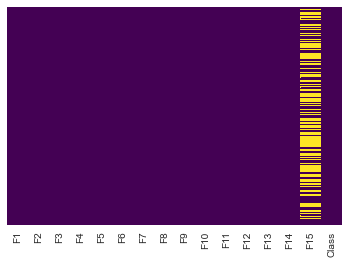

In [66]:
sns.heatmap(mainDf.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Replacing the null values using boxplot

In [117]:
trainDF = mainDf.copy()
trainDF.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,16,6.03,-4.56,30.00,63.04,0.55,-0.78,0.96,-1.67,1,-339.75,0.84,9.90,-2.22,-9.53,False
1,6,1.41,-4.24,31.38,100.04,0.06,1.08,0.60,-3.67,1,-246.75,-0.62,12.32,-0.56,NaN,False
2,630,43.35,0.50,50.70,219.04,-3.46,10.08,5.65,-14.67,10,-129.75,-3.40,1.80,8.48,-10.29,False
3,30,2.79,-3.58,31.83,69.04,-0.40,-0.09,0.18,-1.67,1,-276.75,-0.32,13.32,1.36,-9.92,False
4,18,0.36,-6.62,32.97,75.04,2.43,0.24,0.48,-0.67,1,-294.75,3.14,10.80,-5.86,NaN,True


In [68]:
def replacingOfNaNValues(dfColumns):
    colF10 = dfColumns[0]
    colF15 = dfColumns[1]
    
    if pd.isnull(colF15):
        if colF10 == 0:
            return -10.9
        elif colF10 == 1:
            return -10.8
        elif colF10 == 5:
            return -11.4
        elif colF10 == 10:
            return -10
    else:
        return colF15

In [114]:
trainDF['F15'].mean()

-10.463013333333334

In [125]:
# trainDF['F15'] = trainDF[['F10','F15']].apply(replacingOfNaNValues,axis=1)
trainDF= trainDF.fillna(trainDF['F15'].mean())

replace_class = {"Class": {False:0, True:1}}
trainDF.replace(replace_class, inplace=True)
trainDF.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,16,6.03,-4.56,30.00,63.04,0.55,-0.78,0.96,-1.67,1,-339.75,0.84,9.90,-2.22,-9.530000,0
1,6,1.41,-4.24,31.38,100.04,0.06,1.08,0.60,-3.67,1,-246.75,-0.62,12.32,-0.56,-10.463013,0
2,630,43.35,0.50,50.70,219.04,-3.46,10.08,5.65,-14.67,10,-129.75,-3.40,1.80,8.48,-10.290000,0
3,30,2.79,-3.58,31.83,69.04,-0.40,-0.09,0.18,-1.67,1,-276.75,-0.32,13.32,1.36,-9.920000,0
4,18,0.36,-6.62,32.97,75.04,2.43,0.24,0.48,-0.67,1,-294.75,3.14,10.80,-5.86,-10.463013,1


<AxesSubplot:>

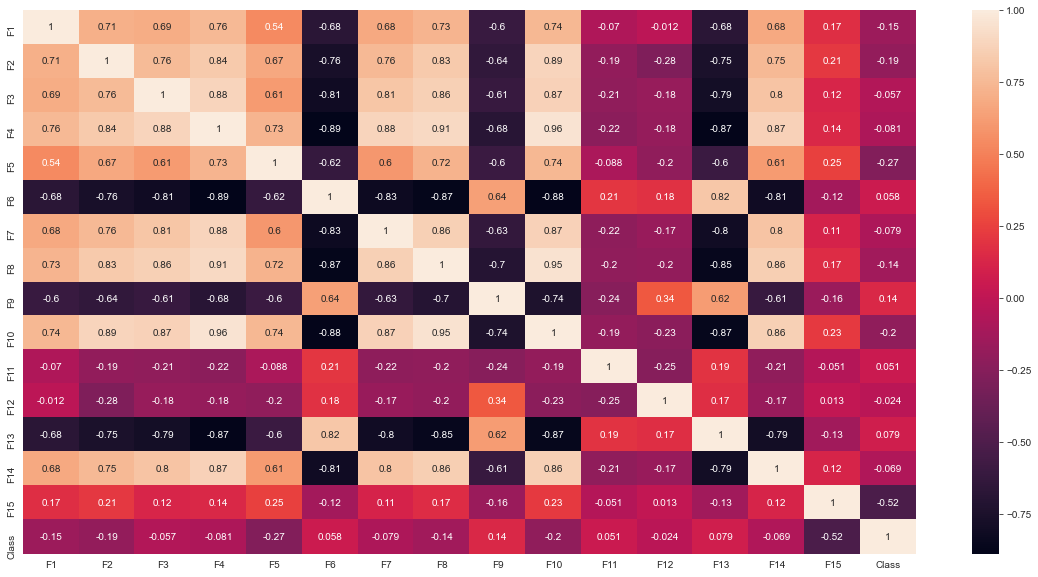

In [126]:
mlp.figure(figsize=(20,10))
sns.heatmap(trainDF.corr(),annot=True)

### Model Building and Data Preprocessing

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Separating input and target data 
inputData = trainDF.iloc[:,0:15]
targetData = trainDF.iloc[:,15:16]

In [128]:
# Splitting of data into 70:30 ratio
# by default shuffling is true 
# random_state should be any integer so that the train/test set doesn't change if re-executed this code again

x_train,x_test,y_train,y_test = train_test_split(inputData,targetData,test_size =0.3,random_state=10) 


### Training Decision tree model 

In [129]:
dt_entropy = DecisionTreeClassifier(criterion="entropy",random_state=10)
dt_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=10)

### Predict output for decision tree model

In [130]:
y_predic_ent = dt_entropy.predict(x_test)
dt_entropy.score(x_test,y_test)

0.7888888888888889

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       233
           1       0.77      0.79      0.78       217

    accuracy                           0.79       450
   macro avg       0.79      0.79      0.79       450
weighted avg       0.79      0.79      0.79       450



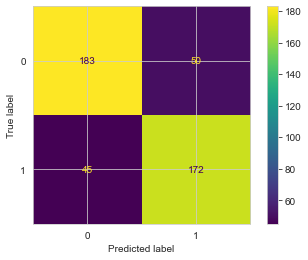

In [172]:
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix
print(classification_report(y_test,y_predic_ent))

plot_confusion_matrix(dt_entropy,x_test,y_test)

### Support Vector Machine Algorithm

In [132]:
from sklearn import svm
svm_model =svm.SVC(C=20,kernel="rbf")

In [133]:
svm_model.fit(x_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(C=20)

In [134]:
svm_y_pred_value = svm_model.predict(x_test)
svm_y_pred_value

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,

In [173]:
svm_model.score(x_test,y_test)

0.6488888888888888

Confusion matrix 
 [[140  93]
 [ 65 152]]
              precision    recall  f1-score   support

           0       0.68      0.60      0.64       233
           1       0.62      0.70      0.66       217

    accuracy                           0.65       450
   macro avg       0.65      0.65      0.65       450
weighted avg       0.65      0.65      0.65       450



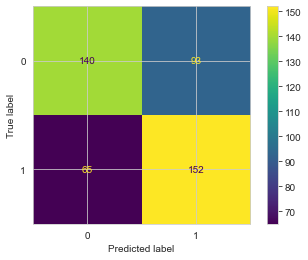

In [142]:
plot_confusion_matrix(svm_model,x_test,y_test)
print("Confusion matrix \n",confusion_matrix(y_test,svm_y_pred_value))
print(classification_report(y_test,svm_y_pred_value))

### Random Forest Algorithm 

In [136]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(100,max_depth=10)
rf_model.fit(x_train,y_train)

<ipython-input-136-2a797c91ea30>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train,y_train)


RandomForestClassifier(max_depth=10)

In [137]:
rf_predn_val =rf_model.predict(x_test)
rf_predn_val

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,

Confusion matrix 
 [[209  24]
 [ 28 189]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       233
           1       0.89      0.87      0.88       217

    accuracy                           0.88       450
   macro avg       0.88      0.88      0.88       450
weighted avg       0.88      0.88      0.88       450



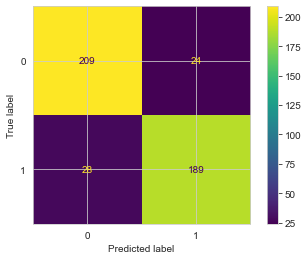

In [143]:
plot_confusion_matrix(rf_model,x_test,y_test)
print("Confusion matrix \n",confusion_matrix(y_test,rf_predn_val))
print(classification_report(y_test,rf_predn_val))

In [144]:
rf_model.score(x_test,y_test)

0.8844444444444445

From comparing the machine learning models for this problem dataset , Randome Forest 
classifiers is giving better results

### Test dataset importing and cleaning 

In [171]:
test_data_orig = pd.read_csv("CE802_P2_Test.csv")
test_data_orig.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,4,5.58,-4.66,31.83,69.04,-0.35,-1.29,0.06,-3.67,1,-243.75,0.94,13.84,-1.48,-11.04,True
1,80,37.95,4.40,50.70,199.04,-4.83,5.19,7.25,-4.67,10,-474.75,-3.34,0.46,8.72,-10.00,True
2,60,1.08,-4.14,32.13,73.04,0.14,2.01,0.59,-3.67,1,-234.75,-1.08,9.36,-1.20,-11.71,True
3,240,34.95,3.74,44.85,264.04,-2.92,11.52,8.45,-14.67,10,-174.75,-3.20,2.94,4.14,-10.40,False
4,42,4.11,-3.78,31.92,92.04,1.09,-2.67,0.72,-3.67,1,-282.75,-0.40,11.20,0.92,-11.14,True


In [162]:
test_data_orig_copy= test_data_orig.copy()

In [163]:
test_data_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   int64  
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   int64  
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   float64
 15  Class   1500 non-null   bool   
dtypes: bool(1), float64(13), int64(2)
memory usage: 177.4 KB


In [164]:
test_data_orig['F15'] = test_data_orig[['F10','F15']].apply(replacingOfNaNValues,axis=1)
test_data_orig

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,4,5.58,-4.66,31.83,69.04,-0.35,-1.29,0.06,-3.67,1,-243.75,0.94,13.84,-1.48,-11.04,True
1,80,37.95,4.40,50.70,199.04,-4.83,5.19,7.25,-4.67,10,-474.75,-3.34,0.46,8.72,-10.00,False
2,60,1.08,-4.14,32.13,73.04,0.14,2.01,0.59,-3.67,1,-234.75,-1.08,9.36,-1.20,-11.71,True
3,240,34.95,3.74,44.85,264.04,-2.92,11.52,8.45,-14.67,10,-174.75,-3.20,2.94,4.14,-10.40,False
4,42,4.11,-3.78,31.92,92.04,1.09,-2.67,0.72,-3.67,1,-282.75,-0.40,11.20,0.92,-11.14,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,62,5.13,-5.32,32.46,72.04,1.17,-1.62,0.41,0.33,1,-306.75,1.20,9.24,0.96,-10.80,True
1496,30,0.69,-3.96,32.70,78.04,-0.16,-0.57,0.01,-1.67,1,-288.75,1.48,9.68,-0.08,-10.80,True
1497,94,4.95,-5.38,32.19,91.04,1.99,1.47,0.56,-1.67,1,-252.75,-0.86,12.04,-0.28,-10.80,True
1498,70,3.72,-6.82,33.06,74.04,0.50,2.52,0.24,0.33,1,-351.75,-0.08,9.48,0.34,-10.80,True


In [165]:
test_data_orig = test_data_orig.drop("Class",axis=1)

In [166]:
test_data_orig

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15
0,4,5.58,-4.66,31.83,69.04,-0.35,-1.29,0.06,-3.67,1,-243.75,0.94,13.84,-1.48,-11.04
1,80,37.95,4.40,50.70,199.04,-4.83,5.19,7.25,-4.67,10,-474.75,-3.34,0.46,8.72,-10.00
2,60,1.08,-4.14,32.13,73.04,0.14,2.01,0.59,-3.67,1,-234.75,-1.08,9.36,-1.20,-11.71
3,240,34.95,3.74,44.85,264.04,-2.92,11.52,8.45,-14.67,10,-174.75,-3.20,2.94,4.14,-10.40
4,42,4.11,-3.78,31.92,92.04,1.09,-2.67,0.72,-3.67,1,-282.75,-0.40,11.20,0.92,-11.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,62,5.13,-5.32,32.46,72.04,1.17,-1.62,0.41,0.33,1,-306.75,1.20,9.24,0.96,-10.80
1496,30,0.69,-3.96,32.70,78.04,-0.16,-0.57,0.01,-1.67,1,-288.75,1.48,9.68,-0.08,-10.80
1497,94,4.95,-5.38,32.19,91.04,1.99,1.47,0.56,-1.67,1,-252.75,-0.86,12.04,-0.28,-10.80
1498,70,3.72,-6.82,33.06,74.04,0.50,2.52,0.24,0.33,1,-351.75,-0.08,9.48,0.34,-10.80


In [167]:
test_data_set_pred_val = rf_model.predict(test_data_orig)
test_data_set_pred_val

array([1, 0, 1, ..., 1, 1, 0])

In [168]:
test_data_orig["Class"] = test_data_set_pred_val
test_data_orig.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,4,5.58,-4.66,31.83,69.04,-0.35,-1.29,0.06,-3.67,1,-243.75,0.94,13.84,-1.48,-11.04,1
1,80,37.95,4.40,50.70,199.04,-4.83,5.19,7.25,-4.67,10,-474.75,-3.34,0.46,8.72,-10.00,0
2,60,1.08,-4.14,32.13,73.04,0.14,2.01,0.59,-3.67,1,-234.75,-1.08,9.36,-1.20,-11.71,1
3,240,34.95,3.74,44.85,264.04,-2.92,11.52,8.45,-14.67,10,-174.75,-3.20,2.94,4.14,-10.40,0
4,42,4.11,-3.78,31.92,92.04,1.09,-2.67,0.72,-3.67,1,-282.75,-0.40,11.20,0.92,-11.14,1


In [169]:
cleanup_test_data = {"Class": {0:False, 1:True}}
test_data_orig.replace(cleanup_test_data, inplace=True)
test_data_orig.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,4,5.58,-4.66,31.83,69.04,-0.35,-1.29,0.06,-3.67,1,-243.75,0.94,13.84,-1.48,-11.04,True
1,80,37.95,4.40,50.70,199.04,-4.83,5.19,7.25,-4.67,10,-474.75,-3.34,0.46,8.72,-10.00,False
2,60,1.08,-4.14,32.13,73.04,0.14,2.01,0.59,-3.67,1,-234.75,-1.08,9.36,-1.20,-11.71,True
3,240,34.95,3.74,44.85,264.04,-2.92,11.52,8.45,-14.67,10,-174.75,-3.20,2.94,4.14,-10.40,False
4,42,4.11,-3.78,31.92,92.04,1.09,-2.67,0.72,-3.67,1,-282.75,-0.40,11.20,0.92,-11.14,True


In [170]:
 test_data_orig.to_csv("/Users/abhaymamadapur/Desktop/ML submissions/CE802_P2_Data/CE802_P2_Test_final.csv")